In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(9.7,6.27)})
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Задание №1

    В таблице 1 представлены результаты измерений производительности сетевых устройств №1 и №2. Они являются результатом 
    серии экспериментов по проверке метода измерения производительности. Известно, что для всех устройств тестировали 1G 
    интерфейс однородной смесью UDP-трафика.



---


####  Часть 1.	Спрогнозировать значение UDP Throughput для сетевого устройства №3, имеющего параметры: 
* Тактовая частота процессора: 2000 ГГц. 
* Утилизация процессора: 40%.
* Температура процессора: 54 °С.


In [ ]:
dict_1 = {'Номер замера': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          'Сетевое устройство': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3],
          'Тактовая частота ЦП, ГГц': [1500, 1500, 1500, 1500, 1500, 2600, 2600, 2600, 2600, 2600, 2000],
          'UDP Throughput, Мбит/с': [600, 650, 700, 750, 900, 750, 800, 850, 900, 600, 'NaN'],
          'Утилизация ЦП, %':[50, 55, 60, 65, 70, 35, 40, 45, 50, 30, 40],
          'Температура ЦП, °С':[38, 45, 52, 60, 67, 30, 31, 32, 33, 28, 54]}
data_1 = pd.DataFrame(data=dict_1)
# data_1 = pd.read_excel('data_1.xlsx')
data_1 = data_1.drop('Номер замера', axis=1)
data_1

,Сетевое устройство,"Тактовая частота ЦП, ГГц","UDP Throughput, Мбит/с","Утилизация ЦП, %","Температура ЦП, °С"
0,1,1500,600,50,38
1,1,1500,650,55,45
2,1,1500,700,60,52
3,1,1500,750,65,60
4,1,1500,900,70,67
5,2,2600,750,35,30
6,2,2600,800,40,31
7,2,2600,850,45,32
8,2,2600,900,50,33
9,2,2600,600,30,28


In [ ]:
train = data_1.iloc[0:10]
test = data_1.iloc[10:11]
print(train.shape)
print(test.shape)

(10, 5)
(1, 5)


In [ ]:
X_part_1 = train.drop(['UDP Throughput, Мбит/с', 'Сетевое устройство'], axis=1)
y_part_1 = train['UDP Throughput, Мбит/с']
X_pred_part_1 = test.drop(['UDP Throughput, Мбит/с', 'Сетевое устройство'], axis=1)

s_scaler = StandardScaler()

X_part_1 = s_scaler.fit_transform(X_part_1)
X_pred_part_1 = s_scaler.fit_transform(X_pred_part_1)

In [ ]:
lr = LinearRegression()
model_part_1 = lr.fit(X_part_1, y_part_1)
pred_part_1 = model_part_1.predict(X_pred_part_1)[0]
print(f'UDP Throughput для Сетевого устройства № 3 равно: \033[34m{pred_part_1:.0f} Мбит/с')

UDP Throughput для Сетевого устройства № 3 равно: 750 Мбит/с




---


#### Часть 2.	Спрогнозировать значения утилизации ЦП и температуры ЦП сетевого устройства №4 с тактовой частотой 1700 ГГц для значений UDP Throughput из таблицы 2.

In [ ]:
# data_2 = pd.read_excel('data_2.xlsx')
dict_2 = {'UDP Throughput, Мбит/с': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}
data_2 = pd.DataFrame(data=dict_2)
data_2['Сетевое устройство'] = 4
data_2['Тактовая частота ЦП, ГГц'] = 1700
data_2['Утилизация ЦП, %'] = np.nan
data_2['Температура ЦП, °С'] = np.nan
data_2

,"UDP Throughput, Мбит/с",Сетевое устройство,"Тактовая частота ЦП, ГГц","Утилизация ЦП, %","Температура ЦП, °С"
0,50,4,1700,NaN,NaN
1,100,4,1700,NaN,NaN
2,150,4,1700,NaN,NaN
3,200,4,1700,NaN,NaN
4,250,4,1700,NaN,NaN
5,300,4,1700,NaN,NaN
6,350,4,1700,NaN,NaN
7,400,4,1700,NaN,NaN
8,450,4,1700,NaN,NaN
9,500,4,1700,NaN,NaN


In [ ]:
X_part_2 = data_1.iloc[0:10].drop(['Утилизация ЦП, %', 'Температура ЦП, °С', 'Сетевое устройство'], axis=1)

y_part_2_procent = data_1.iloc[0:10]['Утилизация ЦП, %']
y_part_2_temperature = data_1.iloc[0:10]['Температура ЦП, °С']

X_pred_part_2 = data_2.drop(['Утилизация ЦП, %', 'Температура ЦП, °С'], axis=1)
X_pred_part_2 = X_pred_part_2[['Тактовая частота ЦП, ГГц', 'UDP Throughput, Мбит/с']]


In [ ]:
# X_part_2 = s_scaler.fit_transform(X_part_2)
# X_pred_part_2 = s_scaler.fit_transform(X_pred_part_2)

In [ ]:
model_part_2_procent = lr.fit(X_part_2, y_part_2_procent)
pred_part_2_procent = model_part_2_procent.predict(X_pred_part_2)


model_part_2_temperature = lr.fit(X_part_2, y_part_2_temperature)
pred_part_2_temperature = model_part_2_procent.predict(X_pred_part_2)


In [ ]:
data_2.loc[:, 'Утилизация ЦП, %'] = pred_part_2_procent.astype(int)
data_2.loc[:, 'Температура ЦП, °С'] = pred_part_2_temperature.astype(int)
data_2.loc[:, 'Сетевое устройство'] = 4



---


#### Часть 3. Визуализировать данные о состояниях сетевого устройства №4 из заполненной таблицы 2.

In [ ]:
df2 = data_2[['UDP Throughput, Мбит/с', 'Утилизация ЦП, %', 'Температура ЦП, °С']]
df2

,"UDP Throughput, Мбит/с","Утилизация ЦП, %","Температура ЦП, °С"
0,50,11,9
1,100,14,12
2,150,18,15
3,200,21,18
4,250,24,21
5,300,27,24
6,350,31,26
7,400,34,29
8,450,37,32
9,500,41,35


Из графика видно что, при увеличении пропускной способности, возрастает загруженность процессора


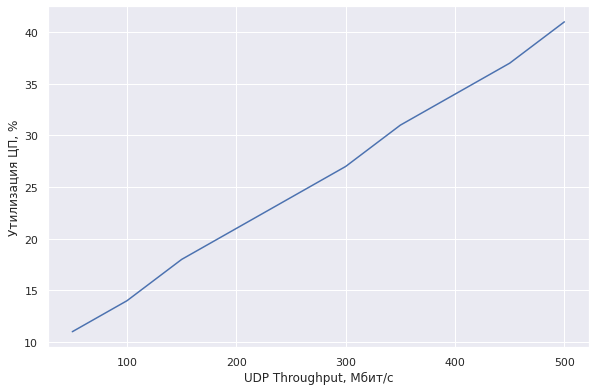

In [ ]:
sns.lineplot(x=df2['UDP Throughput, Мбит/с'], y=df2['Утилизация ЦП, %'])
print('Из графика видно что, при увеличении пропускной способности, возрастает загруженность процессора')

Из графика видно что, при увеличении пропускной способности, возрастает температура процессора


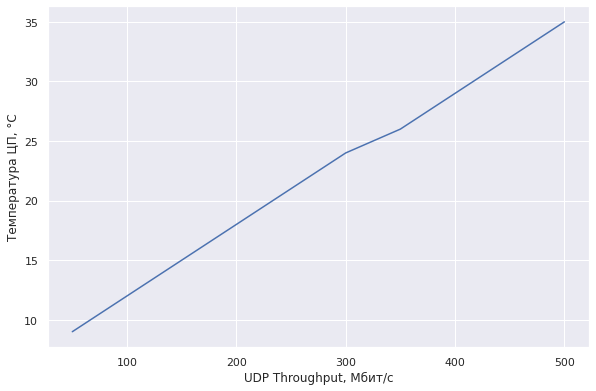

In [ ]:
sns.lineplot(x=df2['UDP Throughput, Мбит/с'], y=df2['Температура ЦП, °С'])
print('Из графика видно что, при увеличении пропускной способности, возрастает температура процессора')



---


# Задание №2
    Линейка продукта представлена сетевыми устройствами №1 - 4. Общие требования к этим устройствам выглядят следующим образом:
* UDP Throughput не менее 900 Мбит/с
* Утилизация ЦП не выше 80%
* Температура ЦП не выше 60 °С




---


## Подготовьте требования к методике нагрузочного тестирования сетевых устройств.

1.	Сформулируйте требования к методу измерения на основании требований к продукту.
2.	Опишите метод измерения:
    * Опишите алгоритм проведения тестирования.
    * Опишите условия проведения тестирования.
    * Опишите тестовое окружение.
3.	При формировании требований опирайтесь на данные из Задания 1.




---


### требования к методике нагрузочного тестирования сетевых устройств

Так как UDP Throughput  должна быть не менее 900 Мбит/с, следует начать с этого значения, постепенно увеличивая UDP Throughput  с шагом в 50 Мбит/с (если возможно), фиксируя при этом показания "Утилизации ЦП" и "Температура ЦП", до тех пор пока "Утилизация ЦП" или "Температура ЦП" не достигнет критических значений указанных в требованиях к данным сетевым устройствам. Так будет определена максимальная UDP Throughput.




---


#### На основе представленных данных:

* Дайте собственные определения понятиям "метод измерения производительности" и "методика нагрузочного тестирования"


1. Метод измерения производительности - это метод позволяющий с высокой 
точностью выявить жизнеспособна ли системы, в тех или иных условиях. То есть это что-то, что заточено под конкретную задачу.

2. Методика нагрузочного тестирования, описывает лишь в общих чертах, не привязываясь к конкретной задаче